# Quick View to Association Rule Mining Using Apriori & FP-Growth Tree

### What is Association Rule Mining?

#### An associaton rule mining  can also be called as Frequent Pattern Mining. The aim of association rule mining is to discover the inherent regularities in the data

In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth

In [4]:
#reading the data using pandas read csv command
df = pd.read_csv("../Excel/lastfm.csv")

In [5]:
df_ = df[["user", "artist"]]

In [8]:
#converting our data into the list
records = []

for i in df_["user"].unique():
    records.append(list(df_[df_["user"] == i]["artist"].values))

In [9]:
# mlxtend has its own function to convert the data into True or False type of encoding. 
# It is similar to one hot encoding in sklearn preprocessing
TE = TransactionEncoder()

In [10]:
#fitting and transforming the data 
te_array = TE.fit(records).transform(records)

In [11]:
#converting the data into dataframe
te_df = pd.DataFrame(te_array, columns = TE.columns_)

In [13]:
te_df.head(5)

,...and you will know us by the trail of dead,2pac,3 doors down,30 seconds to mars,311,36 crazyfists,44,50 cent,65daysofstatic,[unknown],...,wilco,within temptation,wolfgang amadeus mozart,wu-tang clan,yann tiersen,yeah yeah yeahs,yellowcard,yo la tengo,zero 7,Édith piaf
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##  Apriori Algorithm 

#### Apriori is an algorithm for frequent item set mining and association rule learning over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database.

In [14]:
# to work with apriori algorithm we need to set some minimum support threshold
# to determine the min threshold, purely depends upon the domain knowledge
frequent_items = apriori(te_df, min_support = 0.02, use_colnames = True)

In [15]:
frequent_items

,support,itemsets
0,0.022733,(2pac)
1,0.030933,(3 doors down)
2,0.032800,(30 seconds to mars)
3,0.021800,(50 cent)
4,0.036867,([unknown])
...,...,...
397,0.023400,"(the doors, the beatles)"
398,0.023467,"(the killers, the beatles)"
399,0.030467,"(the rolling stones, the beatles)"
400,0.025467,"(the white stripes, the beatles)"


In [16]:
association_rule = association_rules(frequent_items, min_threshold = 0.02, metric = "support")

In [17]:
# writing the file into csv
association_rule.to_csv("association_rule.csv")

## FP-Growth Algorithm

#### The FP-Growth Algorithm, proposed by Han, is an efficient and scalable method for mining the complete set of frequent patterns by pattern fragment growth, using an extended prefix-tree structure for storing compressed and crucial information about frequent patterns named frequent-pattern tree (FP-tree)

In [18]:
fp_rule = fpgrowth(te_df, min_support = 0.01, use_colnames = True)

In [19]:
fp_rule

,support,itemsets
0,0.119067,(red hot chili peppers)
1,0.098200,(the killers)
2,0.062933,(the rolling stones)
3,0.056333,(jack johnson)
4,0.034800,(the who)
...,...,...
1684,0.010800,"(my chemical romance, green day)"
1685,0.011400,"(the killers, my chemical romance)"
1686,0.013200,"(linkin park, my chemical romance)"
1687,0.012533,"(jason mraz, coldplay)"


In [20]:
association_rule_ = association_rules(fp_rule, min_threshold = 0.01, metric = "support")

In [122]:
# writing the file into csv
association_rule_.to_csv("fp_association_rule.csv")

Note: The FP-Growth Algorithm is much more faster & efficient than the Apriori Algorithm. The reason behind this is under FP-Growth the algorithm need to scan the database only twice while under the Apriori Algorithm, this scans the data at each iteration.

To clear more, the apriori algorithm is a classic learning algorithm where it used the hash tree like structure.

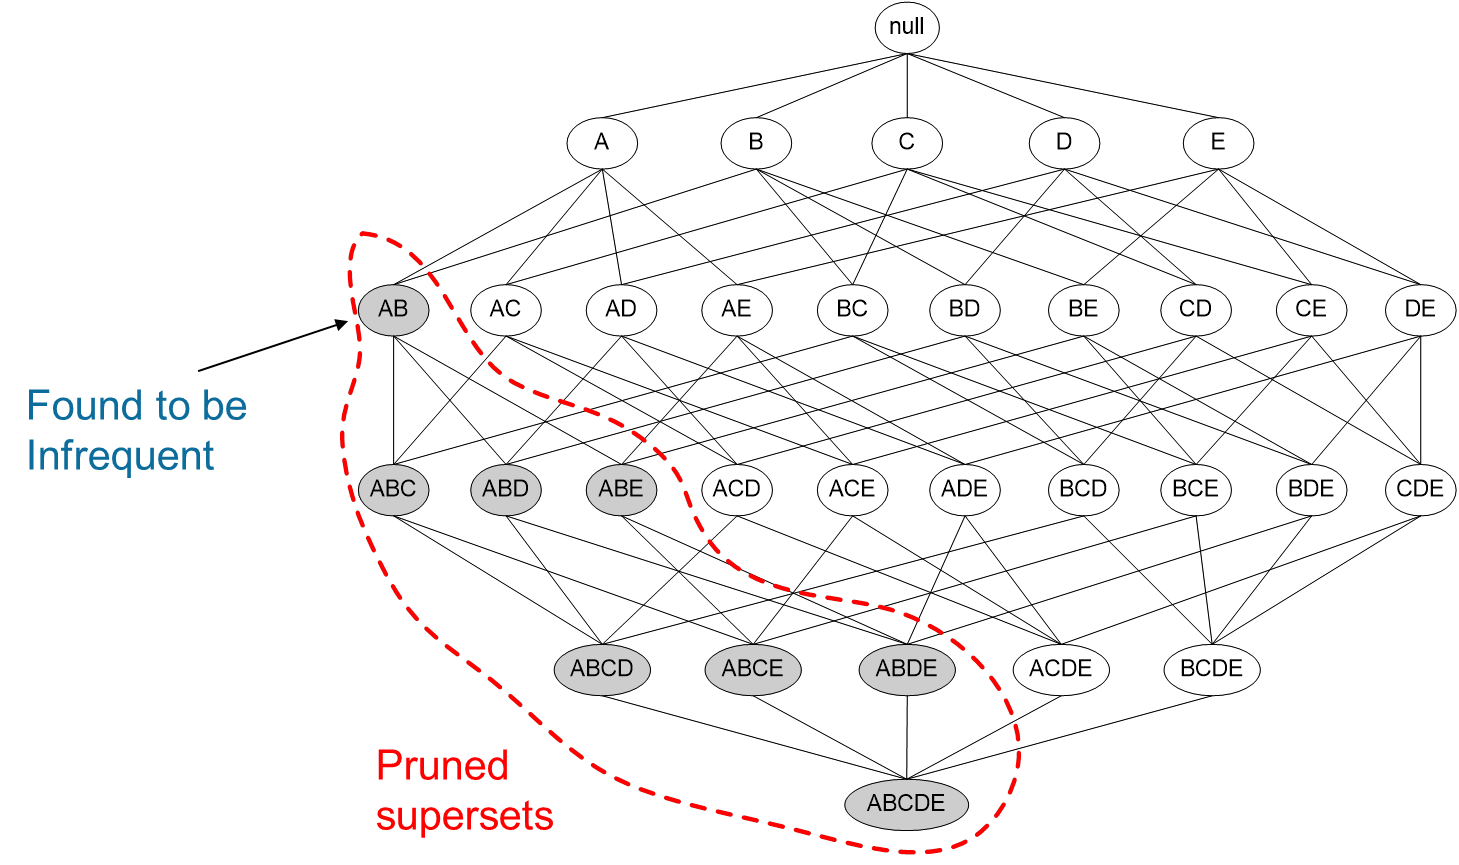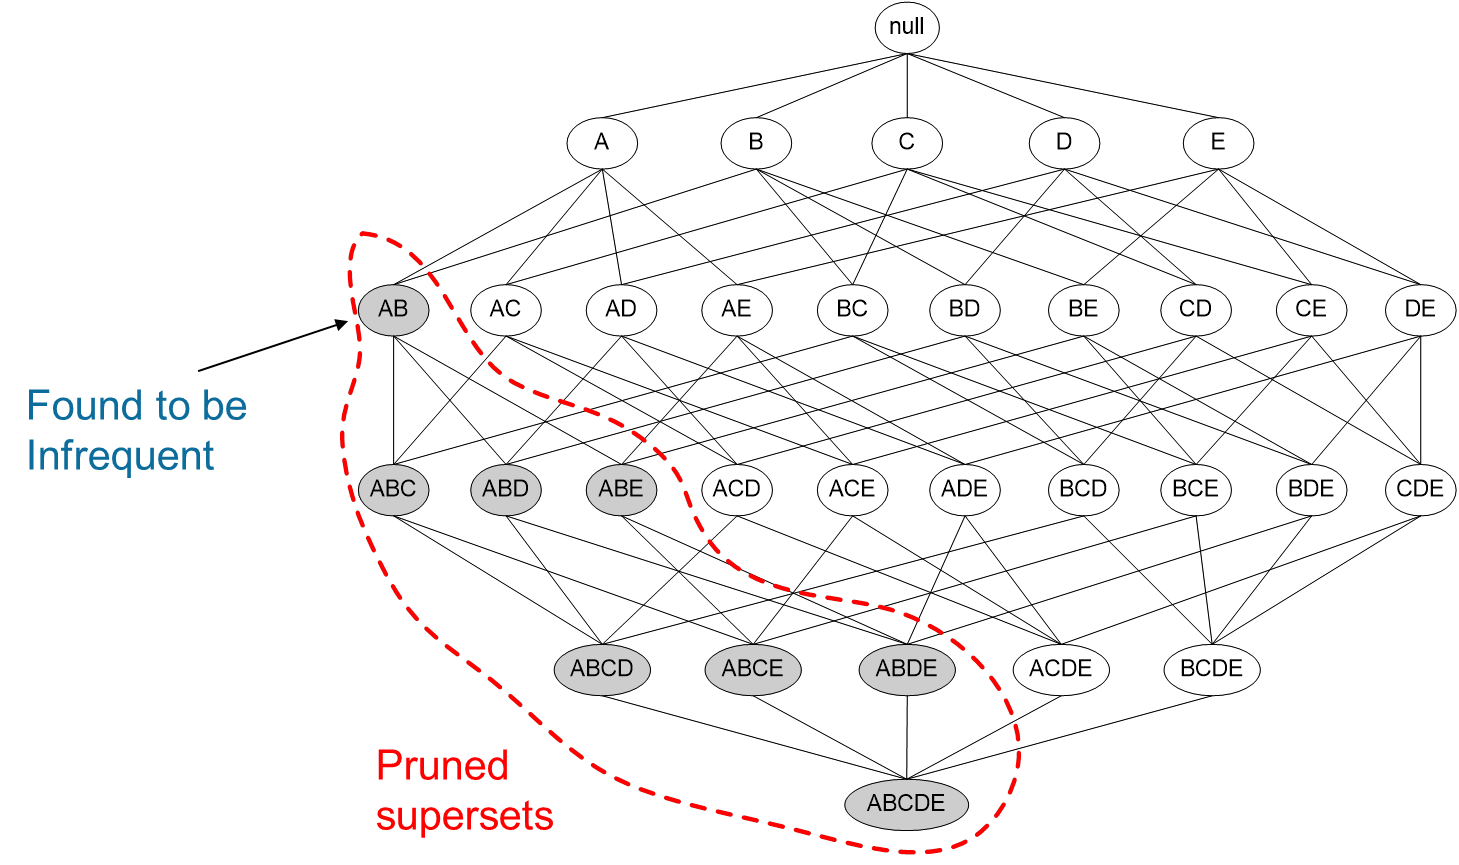

When it comes to the FP-Grwoth Algorithm, it uses the FP Grwoth which is much faster than the classic apriori algorithm

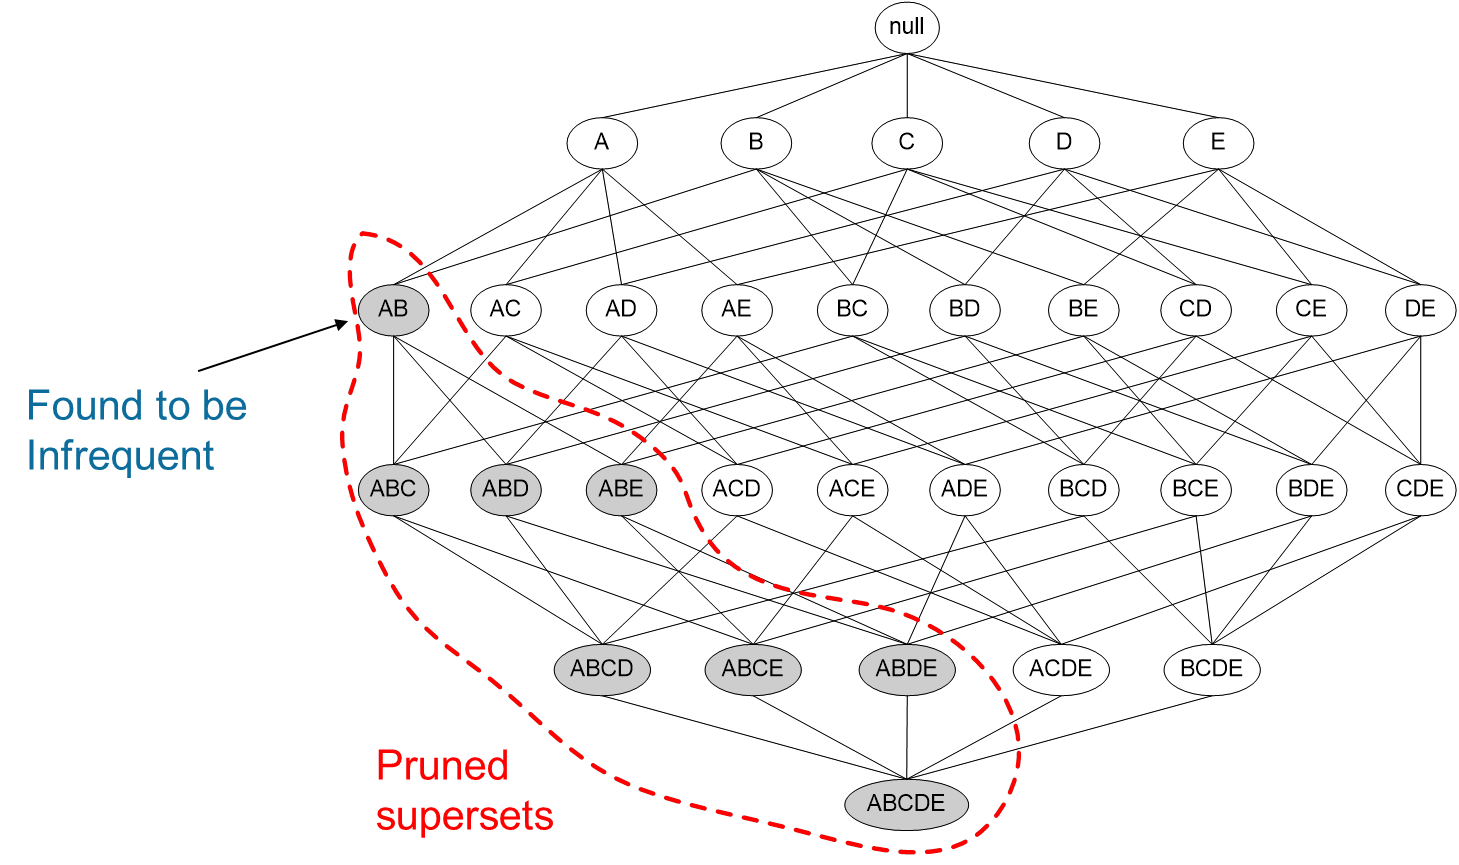